# ECE 570 Assignment 2 Instructions

## **Instructions**
This Jupyter notebook document entitled **Assignment_02_Instructions** contains instructions for doing your assignment exercise.
A second Jupyter notebook document entited **Assignment_01_Exercise** contains all the exercises that you will need to perform.

As you read each section of this instruction, you should try running the associated code snippets. 
The colaboratory environment allows you to run code snippets locally by clicking on the arrow on the left of the code. This is a wonderful feature that allows you to experiment as you read. You should take advantage of this and experiment and test different ideas, so you can become more familiar with the Python and the Jupyter programing environment. 

At the end of each sub-section, there will be exercises to perform. 
You should perform the exercises in the document **Assignment_02_Exercise**, which will contain all your results. 
You can then hand in your results by printing the **Assignment_02_Exercise** document as a pdf with all code and simulation results included.

## Section 1: Loading and manipulating data

In this lab we will use Pandas and Scikit-learn packages to create and analyse data. 

### Basics of pandas
**Pandas** is useful for open source data analysis. It helps on loading different types of raw data and manipulate the data in a highly effective way.  We will only use simple loading and processing functions in this assignment but there are many more advanced manipulations that can be very helpful for manipulating real-world data.

Please read the first three pages of the ["Getting Started" tutorials in the pandas documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/index.html):
 - [What kind of data does pandas handle?](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/01_table_oriented.html)
 - [How do I read and write tabular data?](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/02_read_write.html)
 - [How do I select a subset of a DataFrame?](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/03_subset_data.html)

### Basics of scikit-learn
**Scikit-learn** is a powerful tool for machine learning in Python. It has many built-in functions that can help creating/preprocessing data and performing standard machine learning tasks such as classification, regression, clustering, etc. 

Please read the following getting started guide that explains the basic concepts used in scikit-learn:
https://scikit-learn.org/stable/getting_started.html

Also, feel free to explore the scikit-learn documentation, tutorials, and examples.  The library is well-documented with many excellent examples where you can download the code and try yourself.

### Load the data
In Colab, this is done a little differently since you are using a cloud server instead of a computer. Therefore any external data needs to be uploaded to the server first before any manipulation on the data. Luckily, it is pretty easy to implement on Colab. **All you need to do is to upload your data file on your Google Drive and Mount the drive in Colab.** Here is what you do:
(Following the instructions in the code block: click the link to obtain the password/key and copy it back here)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
with open('/content/drive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/drive/My\ Drive/foo.txt

You home directory should be ```/content/drive/My Drive```.

After mounting your drive, you should be able to access your file in the same way just like on your own computer. Then we need to load the datasets. One of the most common type of file for datasets is .csv file which the pandas package provide nice functions for this task.

In [3]:
import pandas as pd
data = pd.read_csv("Your-csvFile-location")

Besides simply loading csv files, there are some useful functions for manipulating data.

In [4]:
import pandas as pd
import numpy as np

# Creating Dataframe structure from numpy array
df1 = pd.DataFrame(np.random.randn(10,3),columns=['col1','col2','col3'])
df1

,col1,col2,col3
0,-0.184436,0.435754,1.191385
1,0.786151,-1.726497,1.517156
2,0.847952,-0.806312,-0.450352
3,0.820318,0.393515,0.044630
4,-0.549352,1.654762,-0.244945
5,0.714768,0.089639,-0.948801
6,2.221312,0.975231,-1.645093
7,0.802822,-1.820003,0.795052
8,-1.630365,0.950813,-0.132997
9,-0.378337,0.983146,0.564978


In [5]:
# Drop a column
df2 = df1.drop(['col1'], axis=1)
df2

,col2,col3
0,0.435754,1.191385
1,-1.726497,1.517156
2,-0.806312,-0.450352
3,0.393515,0.044630
4,1.654762,-0.244945
5,0.089639,-0.948801
6,0.975231,-1.645093
7,-1.820003,0.795052
8,0.950813,-0.132997
9,0.983146,0.564978


In [6]:
# Access a column
df3 = df1['col1']
df3

0   -0.184436
1    0.786151
2    0.847952
3    0.820318
4   -0.549352
5    0.714768
6    2.221312
7    0.802822
8   -1.630365
9   -0.378337
Name: col1, dtype: float64

For more useful functions and tricks please refer to (https://www.tutorialspoint.com/python_pandas/index.htm)

## Data preprocessing
Usually any data we have is raw and cannot just be plugged into the algorithm directly. Therefore, we need to preprocess the data so that can turn the raw data into the data that we can actually work on. And this step is called data preprocessing. There are different strategies for different types of data.  


For numerical data, a common preprocessing step is to make the features have zero-mean and unit-variance. Here is an easy way of doing this.

In [7]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# create data
data = np.array([[20, 0.002],
				[100, 0.05],
				[75, 0.027],
				[82, 0.07],
				[17, 0.03]])
print(f'Before scaled:\n {data}')

# define standard scaler
scaler = StandardScaler()
# fit (i.e., find mean and standard deviation) 
#  and transform (i.e., subtract mean and divide by standard deviation)
#  in one step call
scaled_data = scaler.fit_transform(data)
print(f'After scaled:\n {scaled_data}')

Before scaled:
 [[2.0e+01 2.0e-03]
 [1.0e+02 5.0e-02]
 [7.5e+01 2.7e-02]
 [8.2e+01 7.0e-02]
 [1.7e+01 3.0e-02]]
After scaled:
 [[-1.14407    -1.47520914]
 [ 1.21483721  0.61976242]
 [ 0.47767871 -0.38407812]
 [ 0.68408309  1.49266723]
 [-1.23252902 -0.2531424 ]]


For non-numerical data, we somehow need to tranform the data into numbers. This is common for classification tasks since each class is usually labelled with names, i.e., a string. Turning this kind of feature into number representation is called **encoding categorical features**. There are many ways to do this, the simpliest way is through **label encoding**.

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
data = ["paris", "paris", "tokyo", "amsterdam", "lafayette", "amsterdam"]

print(f'Original data:\n {data}')

# define standard scaler
label_encode = LabelEncoder()
# transform data
label_data = label_encode.fit_transform(data)
print(f'label_data:\n {label_data}')


Original data:
 ['paris', 'paris', 'tokyo', 'amsterdam', 'lafayette', 'amsterdam']
label_data:
 [2 2 3 0 1 0]


### Splitting the datasets into training set and test set
It is crucial to have a test dataset to evaluate the model we have learned. And scikit-learn provides a simple way of doing this. 

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split

X, y = np.arange(100).reshape((-1, 2)), np.array(range(50))
print(f'Original data shape X:{X.shape}, y:{y.shape}')

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(f'Training data shape X:{X_train.shape}, y:{y_train.shape}')
print(f'Test data shape X:{X_test.shape}, y:{y_test.shape}')

Original data shape X:(50, 2), y:(50,)
Training data shape X:(40, 2), y:(40,)
Test data shape X:(10, 2), y:(10,)


## Section 2: Train and evaluate the model

### K Nearest Neighbor classification
Scikit also provides a simple KNN implemenetation. It works as follows:

In [10]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Create datasets
num_samples_per_class = 1000
mean1, cov1 = [-2,2], [[2,0],[0,2]]
mean2, cov2 = [2,-2], [[2,0],[0,2]]
X1 = np.random.multivariate_normal(mean1, cov1, num_samples_per_class)
X2 = np.random.multivariate_normal(mean2, cov2, num_samples_per_class)

X = np.concatenate((X1,X2))
y = np.concatenate((np.zeros(num_samples_per_class),np.ones(num_samples_per_class)))

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)
print(f'Training data shape X:{X_train.shape}, y:{y_train.shape}')
print(f'Test data shape X:{X_test.shape}, y:{y_test.shape}')

# Create the KNN classifier
neigh = KNeighborsClassifier()
# Fit the data into the classifier
neigh.fit(X_train, y_train)
# Evaluate our model
train_score = neigh.score(X_train, y_train)
test_score = neigh.score(X_test, y_test)
print(f'Training score is {train_score}, Test score is {test_score}')


Training data shape X:(1000, 2), y:(1000,)
Test data shape X:(1000, 2), y:(1000,)
Training score is 0.981, Test score is 0.976


Note: Our training score is higher than our test score, which is expected because the model only 'sees' the training set and learned from it.

**Question: How do we find the best hyperparamters for KNN classifier?**
This can be done via cross validation using the `GridSearchCV` estimator in scikit-learn. The gridsearch estimator simply does an exhaustive search over all possible combinations of paramter choices. For example, if I want to find the best `n_neighbors` parameter among **[1,3,5,7,9,11]** for KNN as well as the best distance `metric` among **['euclidean', 'manhattan', 'chebyshev']**, `GridSearchCV` could be built as below.  Note that this will actually fit `6*3*cv` models since there are 6 `n_neighbors` parameters and 3 `metric` parameters and there are `cv` number of cross validation folds.

In [11]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'n_neighbors': [1,3,5,7,9,11],
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
}

KNN_GV = GridSearchCV(KNeighborsClassifier(),
                      grid_params,
                      cv = 5 # Specifies the number of fractions for cross validation
                     )

result = KNN_GV.fit(X_train, y_train)
print(f'The best parameters are {result.best_params_}')
train_score = KNN_GV.score(X_train, y_train)
test_score = KNN_GV.score(X_test, y_test)
print(f'Training score is {train_score}, Test score is {test_score}')

The best parameters are {'metric': 'euclidean', 'n_neighbors': 9}
Training score is 0.982, Test score is 0.981


Here, the grid search do a total number of 18 parameter setttings of KNN with each iteration a different combination of parameters. And among the 18 combinations, the best training score is 0.977 withe a corresponding test score of 0.971.

### Simple linear regression
Scikit-learn also provides a simple implemention of linear regression, here is how it works.

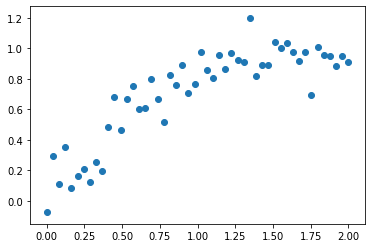

In [12]:
# We first create something we need to fit
num_samples = 50
X = np.linspace(0,2,num_samples)
y = np.sin(X) + 0.1*np.random.randn(num_samples)
plt.scatter(X, y)
plt.show()

Here we show a simple 1D linear regresssion.

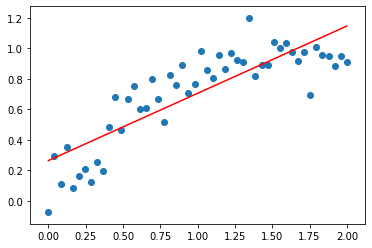

In [13]:
from sklearn.linear_model import LinearRegression

xfit = np.linspace(0, 2, 1000)

lin_reg = LinearRegression()
lin_reg.fit(X[:, np.newaxis], y)
yfit = lin_reg.predict(xfit[:, np.newaxis])
plt.plot(xfit, yfit, 'r')
plt.scatter(X, y)
    
plt.show()

### Linear regression with polynomial features = 1D polynomial regression!
Now, lets extend linear regression with "pseudo features" by creating polynomial features from the original data, i.e., pseudo features for various powers of the original data: 
$z_1 = x$, $z_2 = x^2$, $z_3 = x^3$, $z_4 = x^4$, etc.  
We can do this easily by first passing the data through a scikit-learn estimator that creates these polynomial features and then running a linear regression method so that our 1D model is a polynomial function: 
$$\theta_1 z_1 + \theta_2 z_2 + \theta_3 z_3 \cdots = \theta_1 x + \theta_2 x^2 + \theta_3 x^3 \cdots \, .$$
[See the python handbook for more details and an in-depth example of linear regression and polynomial regression.](https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html) (There are lots of other options, for example, Gaussian feature is the most used feature and with Ridge/Lasso regularization.)

These two steps (one preprocessing and the other classification) can be combined using scikit-learn's pipeline implementation as seen below.

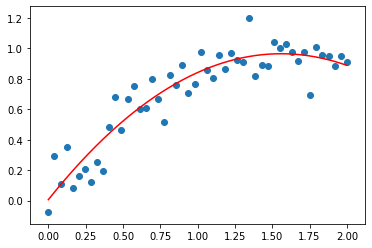

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

xfit = np.linspace(0, 2, 1000)

degree=2
estimator = make_pipeline(PolynomialFeatures(degree), LinearRegression())
estimator.fit(X[:, np.newaxis], y)
yfit = estimator.predict(xfit[:, np.newaxis])
plt.plot(xfit, yfit, 'r')
plt.scatter(X, y)
    
plt.show()

Here instead of passing terms sequentially, I use the function **make_pipeline** which helps to wrap a sequential steps of operation. Using pipeline makes your code much cleaner.